# Import model data

In [1]:
using DataDrop, JSON, Plots

In [2]:
A_gen = DataDrop.retrieve_matrix("PTDF_data/A_gen.h5")
A_load = DataDrop.retrieve_matrix("PTDF_data/A_load.h5")
P_load = DataDrop.retrieve_matrix("PTDF_data/P_load.h5")
A_nuc = DataDrop.retrieve_matrix("PTDF_data/A_nuc.h5")
P_nuc = DataDrop.retrieve_matrix("PTDF_data/P_nuc.h5")
Mi = DataDrop.retrieve_matrix("PTDF_data/incidence_inverse.h5")
thermal_limits = DataDrop.retrieve_matrix("PTDF_data/thermal_limits.h5")
b = DataDrop.retrieve_matrix("PTDF_data/susceptance.h5");

# Import OPF results

### Compare partitions

In [3]:
# datasets = Dict(
#     "52 x 168" => "PTDF_data/P_result.h5",
#     "13 x 28 x 24" => "PTDF_data/P_result_distributed.h5"
# );

### Compare optimizers

In [4]:
# datasets = Dict(
#     "Ipopt" => "PTDF_data/P_result.h5",
#     "Gurobi" => "PTDF_data/P_result_Gurobi.h5"
# );

### Compare line cost functions

In [5]:
# datasets = Dict(
#     "weighted" => "PTDF_data/P_result.h5",
#     "unweighted" => "PTDF_data/P_result_Gurobi_2000.h5"
# );

### Compare line cost values

In [6]:
# datasets = Dict(
#     cost => "PTDF_data/P_result_ramp_$cost.h5" for cost ∈ [250, 500, 1000, 2000, 4000, 8000]
# )

In [7]:
# datasets = Dict(
#     cost => "PTDF_data/P_result_aggregated_$cost.h5" for cost ∈ [500, 1000, 2000, 4000]
# );

In [8]:
datasets = Dict(
    cost => "PTDF_data/P_result_individual_$cost.h5" for cost ∈ [1000, 2000]
);

### With and without ramp constraints

In [9]:
# datasets = Dict(
#     "no ramp constraints" => "PTDF_data/P_result_Gurobi_2000.h5",
#     "ramp constraints " => "PTDF_data/P_result_Gurobi_ramp_2000.h5"
# );

# Analyse

## Generators

In [10]:
# using CSV, DataFrames

# gen_info = sort!(CSV.read("../doc/data/pantagruel_gen_info.csv", DataFrame))

# gen_info.id == collect(1:1083)

Power at each generator:

In [11]:
P_gen = sort(Dict(label => DataDrop.retrieve_matrix(file) for (label, file) ∈ datasets))

OrderedCollections.OrderedDict{Int64, Matrix{Float64}} with 2 entries:
  1000 => [0.0 0.0 … 0.0 0.0; 0.14277 0.0575456 … 1.13008 0.0; … ; 0.2475 0.247…
  2000 => [0.0 0.0 … 0.0 0.0; 0.155131 0.0558964 … 0.94917 0.152205; … ; 0.2475…

In [12]:
# findmax(P_gen["Ipopt"] - P_gen["Gurobi"])

In [13]:
function plot_gen(id::Int, name::String, start=1, length=8736)
    plot()
    for (label, P) ∈ P_gen
        plot!(P[id, start:start+length-1], label=label)
    end
    title!(name)
end

plot_gen (generic function with 3 methods)

### Switzerland hydro

In [14]:
# gen_info[(gen_info.type .== "hydro_pure_storage") .& (gen_info.country .== "CH"), :]

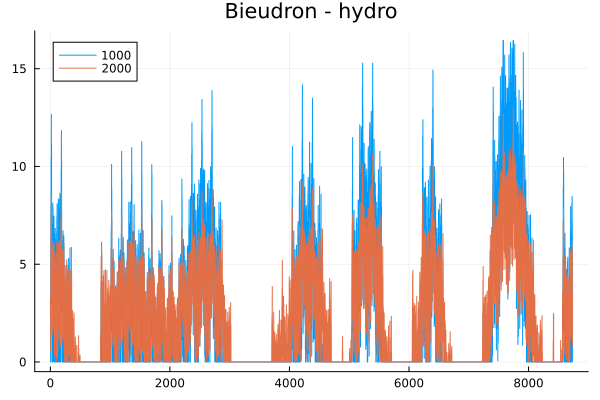

In [15]:
plot_gen(875, "Bieudron - hydro")

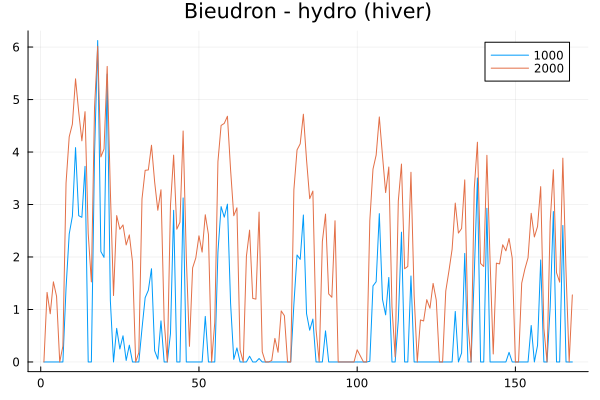

In [16]:
plot_gen(875, "Bieudron - hydro (hiver)", 5 * 7 * 24, 7 * 24)

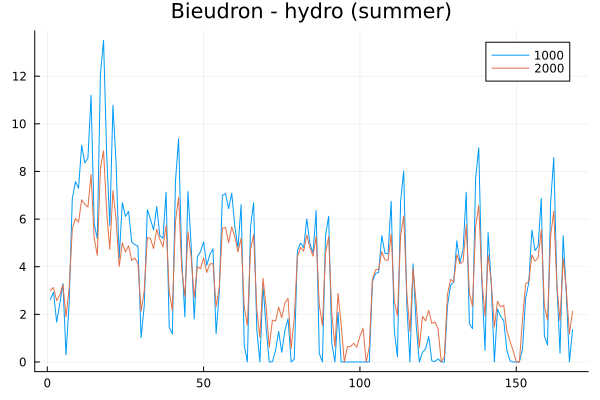

In [17]:
plot_gen(875, "Bieudron - hydro (summer)", 26 * 7 * 24, 7 * 24)

In [28]:
sum(P_gen[2000][876, :]) / maximum(P_gen[2000][876, :]) / 8736

0.1338201050208169

In [29]:
sum(P_gen[2000][877, :]) / maximum(P_gen[2000][877, :]) / 8736

0.13382010227484245

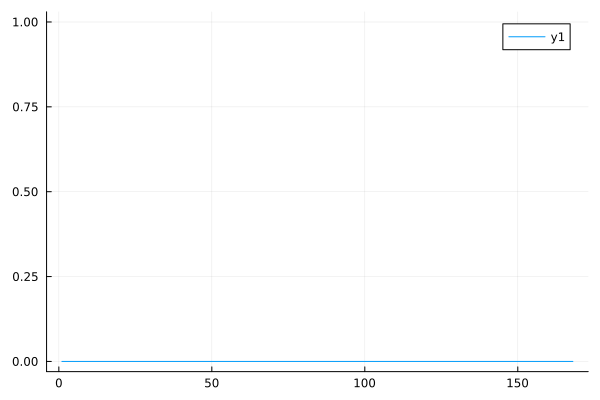

In [31]:
plot(P_gen[2000][876, 1:168])

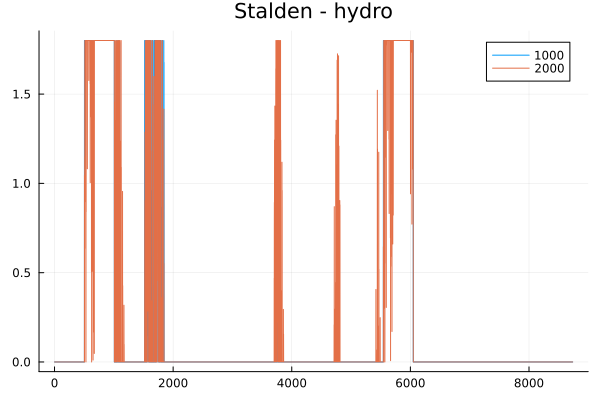

In [11]:
plot_gen(876, "Stalden - hydro")

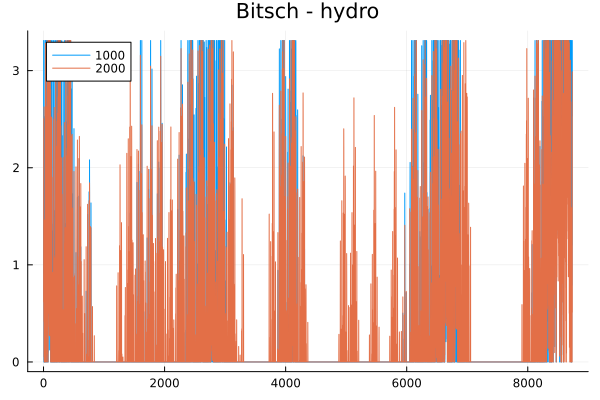

In [12]:
plot_gen(877, "Bitsch - hydro")

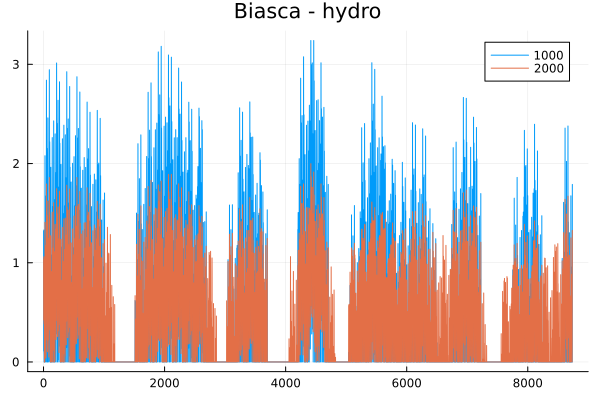

In [33]:
plot_gen(897, "Biasca - hydro")

In [35]:
sum(P_gen[1000][897, :]) / maximum(P_gen[1000][897, :]) / 8736

0.13382011009397332

### Switzerland nuclear

In [19]:
# gen_info[(gen_info.type .== "nuclear") .& (gen_info.country .== "CH"), :]

In [20]:
# plot_gen(943, "Beznau - nuclear")

In [21]:
# plot_gen(943, "Beznau - nuclear", 24 * 7 * 26, 72)

In [22]:
# plot_gen(908, "Leibstadt - nuclear")

In [23]:
# plot_gen(921, "Gösgen - nuclear")

In [24]:
# plot_gen(917, "Mühleberg - nuclear")

### France nuclear

In [25]:
# gen_info[(gen_info.type .== "nuclear") .& (gen_info.country .== "FR"), :]

In [26]:
# plot_gen(757, "Belleville - nuclear")

In [27]:
# plot_gen(751, "Chinon - nuclear")

In [28]:
# plot_gen(751, "Chinon - nuclear", 24 * 7 * 12, 24 * 7)

In [29]:
# plot_gen(982, "Flamanville - nuclear")

In [30]:
# plot_gen(318, "Fessenheim - nuclear")

### France hydro

In [32]:
# gen_info[(gen_info.type .== "Hydro") .& (gen_info.country .== "FR"), :]

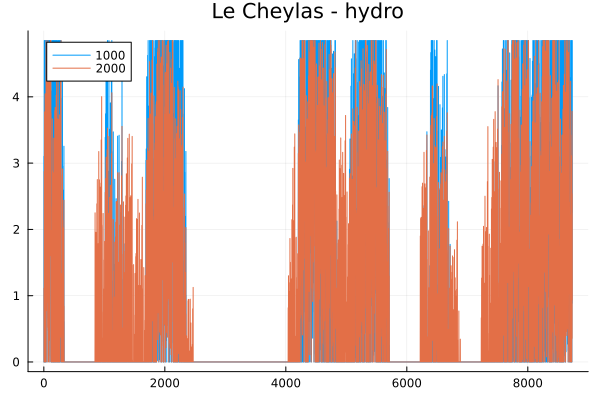

In [16]:
plot_gen(658, "Le Cheylas - hydro")

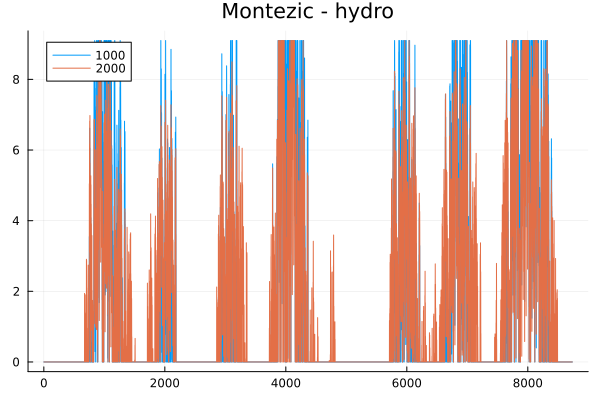

In [17]:
plot_gen(723, "Montezic - hydro")

## Line flows

Compute all injections and verify that they add up to zero:

In [18]:
P_inj = Dict(label => A_gen * P + A_nuc * P_nuc - A_load * P_load for (label, P) ∈ P_gen)

Dict{Int64, Matrix{Float64}} with 2 entries:
  2000 => [-0.816681 -0.80331 … -0.877386 -0.839239; -0.44417 -0.544904 … 0.305…
  1000 => [-0.816681 -0.80331 … -0.877386 -0.839239; -0.456531 -0.543255 … 0.48…

In [19]:
P_inj_total_max = Dict(label => findmax([abs(sum(P[:, t])) for t = 1:24*364])[1] for (label, P) ∈ P_inj)

Dict{Int64, Float64} with 2 entries:
  2000 => 4.72417e-5
  1000 => 3.0202e-5

Power flow through each line (directed):

In [20]:
P_line = Dict(label => Mi * P for (label, P) ∈ P_inj)

Dict{Int64, Matrix{Float64}} with 2 entries:
  2000 => [0.408341 0.401655 … 0.438693 0.41962; 0.408341 0.401655 … 0.438693 0…
  1000 => [0.408341 0.401655 … 0.438693 0.41962; 0.408341 0.401655 … 0.438693 0…

Line loading rate:

In [21]:
R = Dict(label => abs.(P) ./ thermal_limits for (label, P) ∈ P_line)

Dict{Int64, Matrix{Float64}} with 2 entries:
  2000 => [0.0833348 0.0819704 … 0.0895291 0.0856367; 0.0833348 0.0819704 … 0.0…
  1000 => [0.0833348 0.0819704 … 0.0895291 0.0856367; 0.0833348 0.0819704 … 0.0…

Max. rate:

In [22]:
sort(Dict(label => findmax(r)[1] for (label, r) ∈ R))

OrderedCollections.OrderedDict{Int64, Float64} with 2 entries:
  1000 => 1.83311
  2000 => 1.83283

Overloading prevalence:

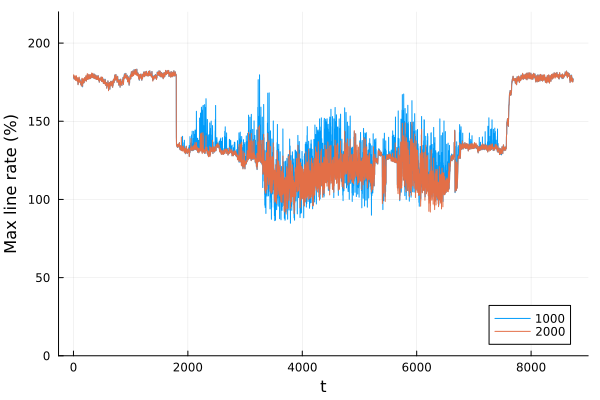

In [23]:
plot()
for (label, r) ∈ sort(R)
    plot!([100 * findmax(r[:,t])[1] for t = 1:24*364], label=label, xlabel="t", ylabel="Max line rate (%)", ylims=(0,220))
end
plot!(show=true)

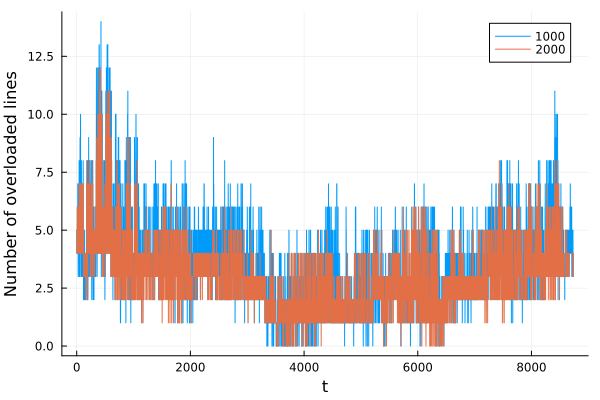

In [24]:
plot()
for (label, r) ∈ sort(R)
    plot!([count(r[:,t] .> 1) for t = 1:24*364], label=label, xlabel="t", ylabel="Number of overloaded lines")
end
plot!(show=true)

In [25]:
sort(Dict(label => findmax([count(r[:,t] .> 1) for t=1:24*364]) for (label, r) ∈ R))

OrderedCollections.OrderedDict{Int64, Tuple{Int64, Int64}} with 2 entries:
  1000 => (14, 427)
  2000 => (12, 395)

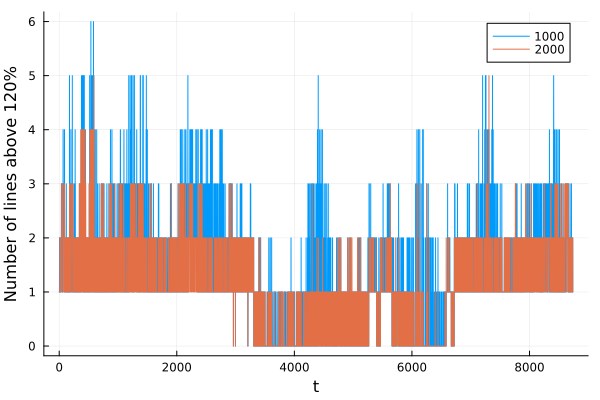

In [26]:
plot()
for (label, r) ∈ sort(R)
    plot!([count(r[:,t] .> 1.2) for t = 1:24*364], label=label, xlabel="t", ylabel="Number of lines above 120%")
end
plot!(show=true)

Voltage angle differences:

In [27]:
Δθ = Dict(label => P ./ b for (label, P) ∈ P_line)

Dict{Int64, Matrix{Float64}} with 2 entries:
  2000 => [0.0184576 0.0181553 … 0.0198295 0.0189674; 0.0184576 0.0181553 … 0.0…
  1000 => [0.0184576 0.0181553 … 0.0198295 0.0189674; 0.0184576 0.0181553 … 0.0…

Max. angle over $\frac{\pi}{4}$:

In [28]:
sort(Dict(label => findmax(val)[1] for (label, val) ∈ Δθ))

OrderedCollections.OrderedDict{Int64, Float64} with 2 entries:
  1000 => 1.24987
  2000 => 1.18594

## Export model

In [45]:
P_gen_export = P_gen[2000]
P_line_export = P_line[2000];

In [46]:
findmax(R[2000])

(1.832825380553459, CartesianIndex(4550, 1108))

In [47]:
findmin([100 * findmax(R[2000][:,t])[1] for t = 1:24*364])

(90.64542326825318, 3716)

In [55]:
t_export = 3716;

In [56]:
network = JSON.parsefile("../models/pantagruel_complete.json")

Dict{String, Any} with 11 entries:
  "bus"      => Dict{String, Any}("4304"=>Dict{String, Any}("coord"=>Any[11.843…
  "name"     => "pantagruel"
  "dcline"   => Dict{String, Any}()
  "gen"      => Dict{String, Any}("1"=>Dict{String, Any}("entsoe_names"=>Any[],…
  "branch"   => Dict{String, Any}("4304"=>Dict{String, Any}("br_r"=>0.00174284,…
  "storage"  => Dict{String, Any}()
  "switch"   => Dict{String, Any}()
  "baseMVA"  => 100
  "per_unit" => true
  "shunt"    => Dict{String, Any}()
  "load"     => Dict{String, Any}("3935"=>Dict{String, Any}("status"=>1, "load_…

Update loads:

In [57]:
bus_ids = sort(collect(parse.(Int,keys(network["bus"]))))
bus_ids_map = Dict(bus_ids[i] => i for i = 1:length(bus_ids))
P_load_per_bus = A_load * P_load

for load ∈ values(network["load"])
    bus = bus_ids_map[load["load_bus"]]
    load["pd"] = P_load_per_bus[bus, t_export]
end

Update lines:

In [58]:
for line ∈ values(network["branch"])
    id = line["index"]
    line["pt"] = P_line_export[id, t_export]
    line["pf"] = -line["pt"]
    line["qf"] = 0
    line["qt"] = 0
end

Update gens:

In [59]:
nuc_ids = [79, 87, 160, 176, 179, 209, 210, 232, 249, 256, 257, 265, 318, 377, 378, 404, 418, 515, 518, 521, 552, 554,
    583, 602, 657, 658, 670, 690, 708, 715, 717, 718, 723, 732, 751, 757, 782, 846, 908, 917, 921, 943, 950, 982]

nuc_ids_map = Dict(nuc_ids[i] => i for i = 1:length(nuc_ids))
gen_ids = setdiff(1:length(network["gen"]), nuc_ids)
gen_ids_map = Dict(gen_ids[i] => i for i = 1:length(gen_ids))

for gen ∈ values(network["gen"])
    id = gen["index"]
    if id ∈ nuc_ids
        gen["pg"] = P_nuc[nuc_ids_map[id], t_export]
    else
        gen["pg"] = P_gen_export[gen_ids_map[id], t_export]
    end
    gen["qg"] = 0
end

In [60]:
# gen_ids = setdiff(1:length(network["gen"]), nuc_ids)

Export JSON:

In [61]:
open("pantagruel_$(t_export).json","w") do f
    JSON.print(f, network) 
end